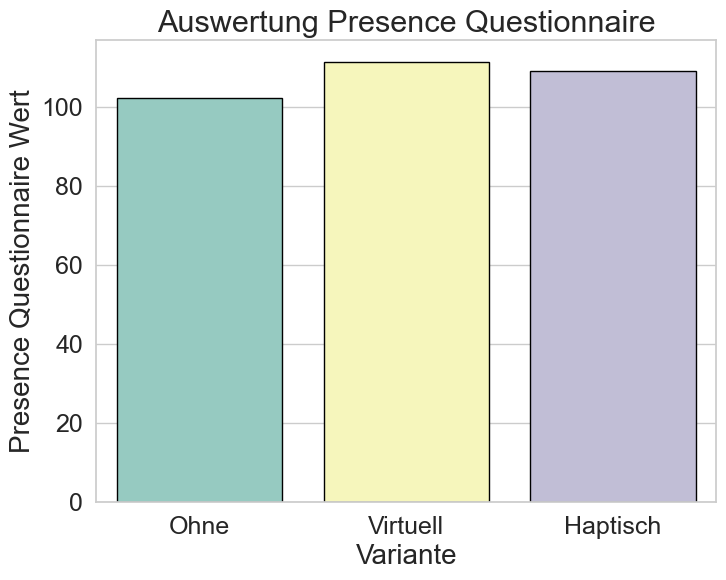

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

fontsizeHeader = 22
fontsizeLabel = 20
fontsize = 18

df = pd.read_csv('../Versuchsdaten_roh/presence_questionnaire.csv', sep=';')

group_values = []
mean_sums = []

df_runs = df.groupby('lauf')
for group_value, group_data in df_runs:
    df_numeric = group_data.select_dtypes(include=[np.number])
    mean = df_numeric.mean()
    #print(group_value + ' ' + str(mean.sum()))
    group_values.append(group_value)
    mean_sums.append(mean.sum())

#for some reason this is shifted. WTF?
a = group_values[0]
aa = mean_sums[0]
group_values[0] = group_values[1]
mean_sums[0] = mean_sums[1]
group_values[1] = group_values[2]
mean_sums[1] = mean_sums[2]
group_values[2] = a
mean_sums[2] = aa

plot_data = pd.DataFrame({'Gruppe': group_values, 'Summe des Durchschnitts': mean_sums})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x="Gruppe", y="Summe des Durchschnitts", data=plot_data, palette="Set3", edgecolor="black")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.xlabel('Variante', fontsize=fontsizeLabel)
plt.ylabel('Presence Questionnaire Wert', fontsize=fontsizeLabel)
plt.title('Auswertung Presence Questionnaire', fontsize=fontsizeHeader)
plt.savefig('../Visualisierungen/presence_questionnaire.png', dpi=300)
plt.show()
